UTILISATION DE TALIB POUR MOVING AVERAGE



In [11]:
import talib
import pandas as pd
from talib import SMA
from talib.abstract import *
import matplotlib.pyplot as plt
csv_list=[]
mypath="C:/Users/noorm/Documents/BitcoinProject-main/BitcoinProject-main/TALIB"
import os
for file in os.listdir(mypath):
    if file.endswith(".csv"):
        csv_list.append(file)
        print(file)

BTCIntraDayData_2022-05-06.csv
BTCIntraDayData_2022-05-09.csv
BTCIntraDayData_2022-05-10.csv


RECUP DES CSV INTO DF 

In [23]:
def get_df(csv):
    df=pd.read_csv(csv)
    return df

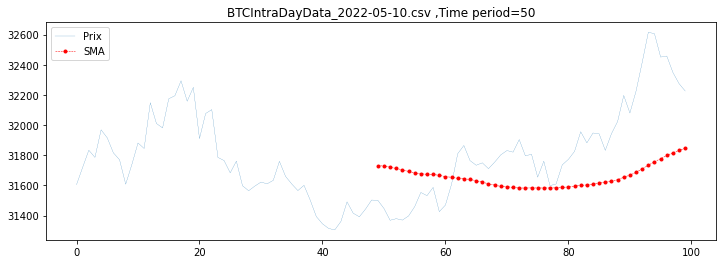

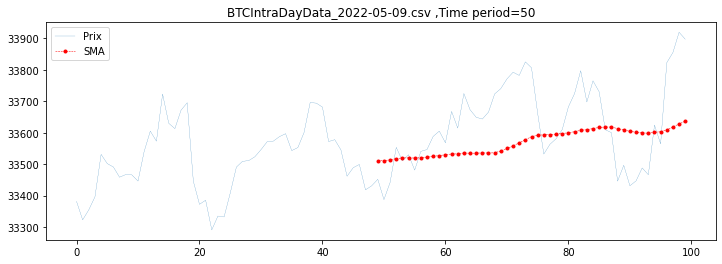

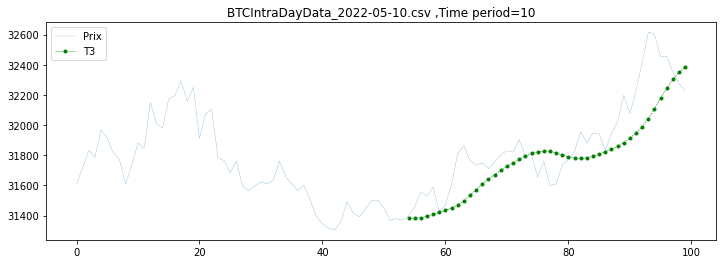

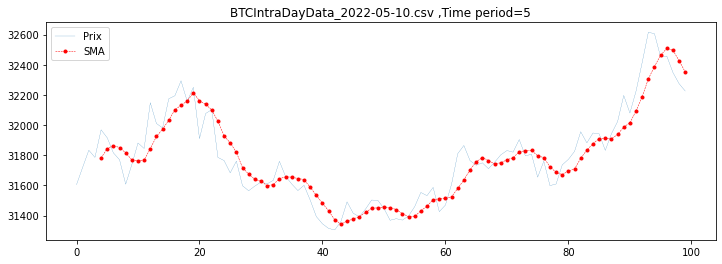

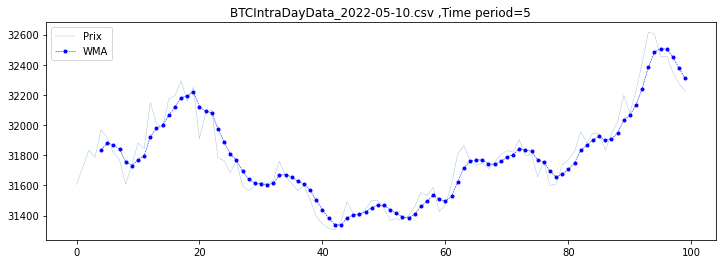

In [42]:
def get_graphe_comp(csv,TA,timep):
    df=get_df(csv)
    if(TA=='SMA'):
        df[TA] = SMA(df['close'],timep) 
        color='red'
    if(TA=='T3'):
        df[TA] = T3(df['close'],timep)
        color='green'
    if(TA=='WMA'):
        df[TA] = WMA(df['close'],timep) 
        color='blue'
    fig, ax = plt.subplots(figsize = (12, 4))
    
    ax.plot(df["close"], linestyle='-', 
            linewidth=0.2, label='Prix')
    ax.plot(df[TA],marker='.',color=color,linestyle='--', linewidth=0.5, label=TA)
    ax.legend();
    plt.title(csv+" ,Time period="+str(timep))

get_graphe_comp('BTCIntraDayData_2022-05-10.csv','SMA',50)
get_graphe_comp('BTCIntraDayData_2022-05-09.csv','SMA',50)
get_graphe_comp('BTCIntraDayData_2022-05-10.csv','T3',10)
get_graphe_comp('BTCIntraDayData_2022-05-10.csv','SMA',5)
get_graphe_comp('BTCIntraDayData_2022-05-10.csv','WMA',5)

    Unnamed: 0            timestamp      open      high       low     close  \
0            1  2022-05-10 12:30:00  31764.82  31790.14  31705.55  31789.36   
1            2  2022-05-10 12:25:00  31683.44  31804.84  31683.19  31764.82   
2            3  2022-05-10 12:20:00  31761.22  31767.62  31660.01  31683.44   
3            4  2022-05-10 12:15:00  31597.80  31784.80  31550.00  31761.21   
4            5  2022-05-10 12:10:00  31564.95  31618.92  31535.28  31597.80   
..         ...                  ...       ...       ...       ...       ...   
95          96  2022-05-10 04:35:00  31052.22  31150.00  31000.62  31138.89   
96          97  2022-05-10 04:30:00  30965.61  31096.84  30936.98  31052.21   
97          98  2022-05-10 04:25:00  30926.96  31040.07  30907.22  30973.19   
98          99  2022-05-10 04:20:00  30949.35  31068.70  30911.97  30926.96   
99         100  2022-05-10 04:15:00  30789.89  30986.90  30786.15  30949.35   

    volume  
0      262  
1      429  
2      429  

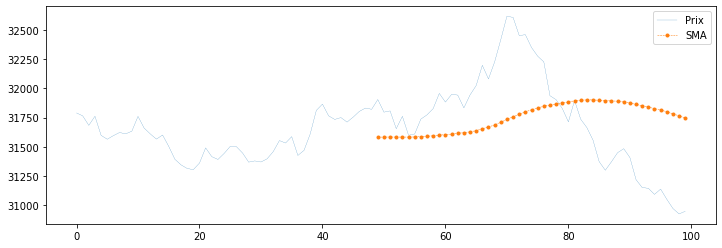

In [14]:
df=get_df('BTCIntraDayData_2022-05-10.csv')
df['SMA'] = SMA(df['close'],timeperiod=50) 
#fig,(ax1,ax2)= plt.subplots(2,sharex=True)
#ax1.plot(df_complet.loc["2010-07-01":"2010-07-22", "PriceUSD"] ,'tab:orange')  
#ax2.plot(df_complet.loc["SMA"])axes = df_complet[["close", "SMA"]].plot(subplots = True, figsize = (10, 10))
fig, ax = plt.subplots(figsize = (12, 4))
ax.plot(df["close"], linestyle='-', 
        linewidth=0.2, label='Prix')
ax.plot(df["SMA"],marker='.', linestyle='--', linewidth=0.5, label='SMA')
ax.legend();


In [ ]:
df['T3'] = T3(df['close'], timeperiod=5) # create column in df automatically
print(df['T3'])

In [ ]:
df['WMA'] = WMA(df['close'], timeperiod=5) # create column in df automatically
print(df['WMA'])